## Question 1: Kalman Filters

In [89]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [91]:
x_k = np.zeros((100,1), np.float)
x_k[0] = 2

w_k = np.random.normal(0, 0.1, 100).reshape(100,1)

n_k = np.random.normal(0, 0.5, 100).reshape(100, 1)

z_k = np.zeros((100,1), np.float)
z_k[0] = x_k[0] + n_k[0]
for i in range(1, 100):
    x_k[i] = x_k[i-1] + w_k[i]
    z_k[i] = x_k[i] + n_k[i]

In [92]:
x_k_hat = np.zeros((100, 1), np.float)
neg_x_k_hat = np.zeros((100, 1), np.float)

P_k = np.zeros((100, 1), np.float)
P_k[0] = 1

neg_P_K = np.zeros((100, 1), np.float)   
K_k = np.zeros((100, 1), np.float)

In [93]:
for i in range(1, 100):
    #Filter Time Update Equations
    neg_x_k_hat[i] = x_k[i-1]
    neg_P_K[i] = P_k[i-1] + 0.1
    
    #Filter Measurement Update Equations
    K_k[i] = neg_P_K[i]/(neg_P_K[i] + 0.5)
    x_k_hat[i] = neg_x_k_hat[i] + K_k[i]*(z_k[i] - neg_x_k_hat[i])
    P_k[i] = (1 - K_k[i])*neg_P_K[i]

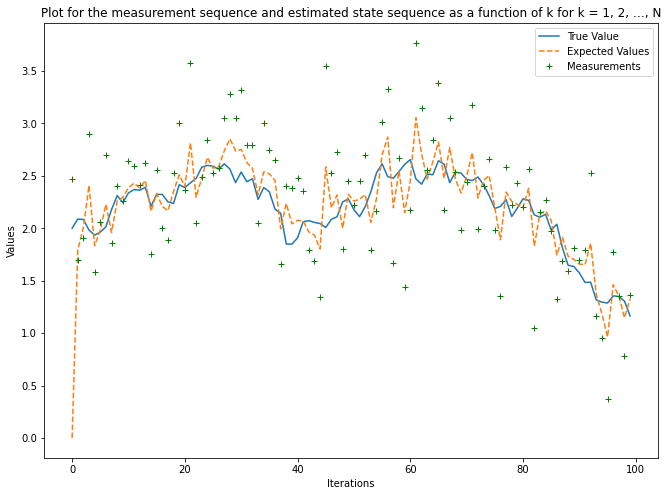

In [94]:
plt.figure(figsize =(11, 8))
plt.plot(x_k, label = "True Value")
plt.plot(x_k_hat, "--", label = "Expected Values")
plt.plot(z_k, "g+", label = "Measurements")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.title("Plot for the measurement sequence and estimated state sequence as a function of k for k = 1, 2, …, N")
plt.legend()
plt.show()

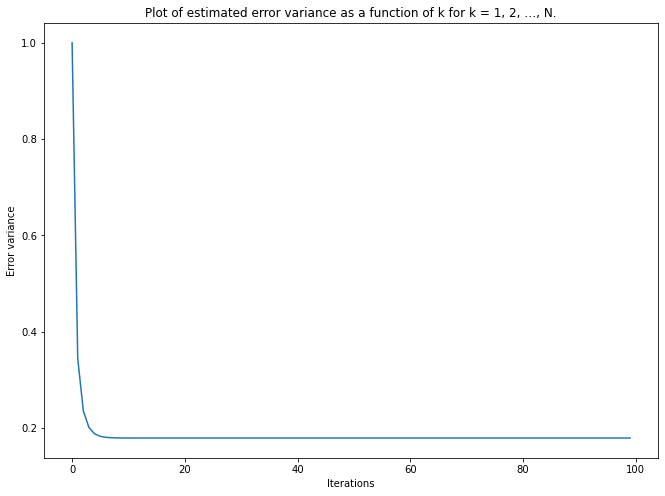

In [95]:
plt.figure(figsize =(11, 8))
plt.plot(P_k)
plt.xlabel("Iterations")
plt.ylabel("Error variance")
plt.title("Plot of estimated error variance as a function of k for k = 1, 2, …, N.")
plt.show()